In [67]:
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import numpy as np

In [68]:
retcsv = pd.read_csv('retcsv.csv', index_col=0, parse_dates=True)


In [69]:
retcsv['DateTime'] = retcsv['DateTime'].str.slice(0,10)
retcsv['DateTime'] = pd.to_datetime(retcsv['DateTime'], format='%Y-%m-%d')
#convert 15-minute level date to daily level data
retcsv= retcsv.drop_duplicates(subset =['DateTime'],keep ='last')
#calculate daily return 
retcsv['return'] =  np.log(retcsv.loc[:,'asset']) -np.log(retcsv.loc[:,'asset'].shift(1))

In [70]:
retcsv = retcsv.set_index('DateTime')
ret = retcsv['return'].tz_localize('UTC')
start = '2019-10-08'

In [72]:
retcsv.head()

,i,f,spread,level,position,signal,pair1_share,pair2_share,cash,asset,return
DateTime,,,,,,,,,,,
2019-10-08,11.02,9.40,0.017506,1,0,0,0,0.0,5000.0,5000.0,NaN
2019-10-09,11.24,9.61,0.017165,1,0,0,0,0.0,5000.0,5000.0,0.0
2019-10-10,11.31,9.64,0.020537,1,0,0,0,0.0,5000.0,5000.0,0.0
2019-10-11,11.22,9.72,0.005026,0,0,0,0,0.0,5000.0,5000.0,0.0
2019-10-14,12.34,9.80,0.092714,1,0,0,0,0.0,5000.0,5000.0,0.0


Start date,2019-10-08
End date,2020-12-07
Total months,13
,Backtest
Annual return,61.7%
Cumulative returns,71.9%
Annual volatility,34.3%
Sharpe ratio,1.57
Calmar ratio,3.91
Stability,0.88
Max drawdown,-15.8%


C:\Users\ykz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.76,2020-07-16,2020-08-12,2020-08-26,30
1,12.69,2020-06-11,2020-06-16,2020-07-03,17
2,8.28,2020-07-13,2020-07-14,2020-07-16,4
3,1.29,2020-07-03,2020-07-06,2020-07-07,3
4,0.68,2020-08-27,2020-08-28,2020-08-31,3


C:\Users\ykz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Stress Events,mean,min,max
New Normal,0.21%,-8.74%,12.77%


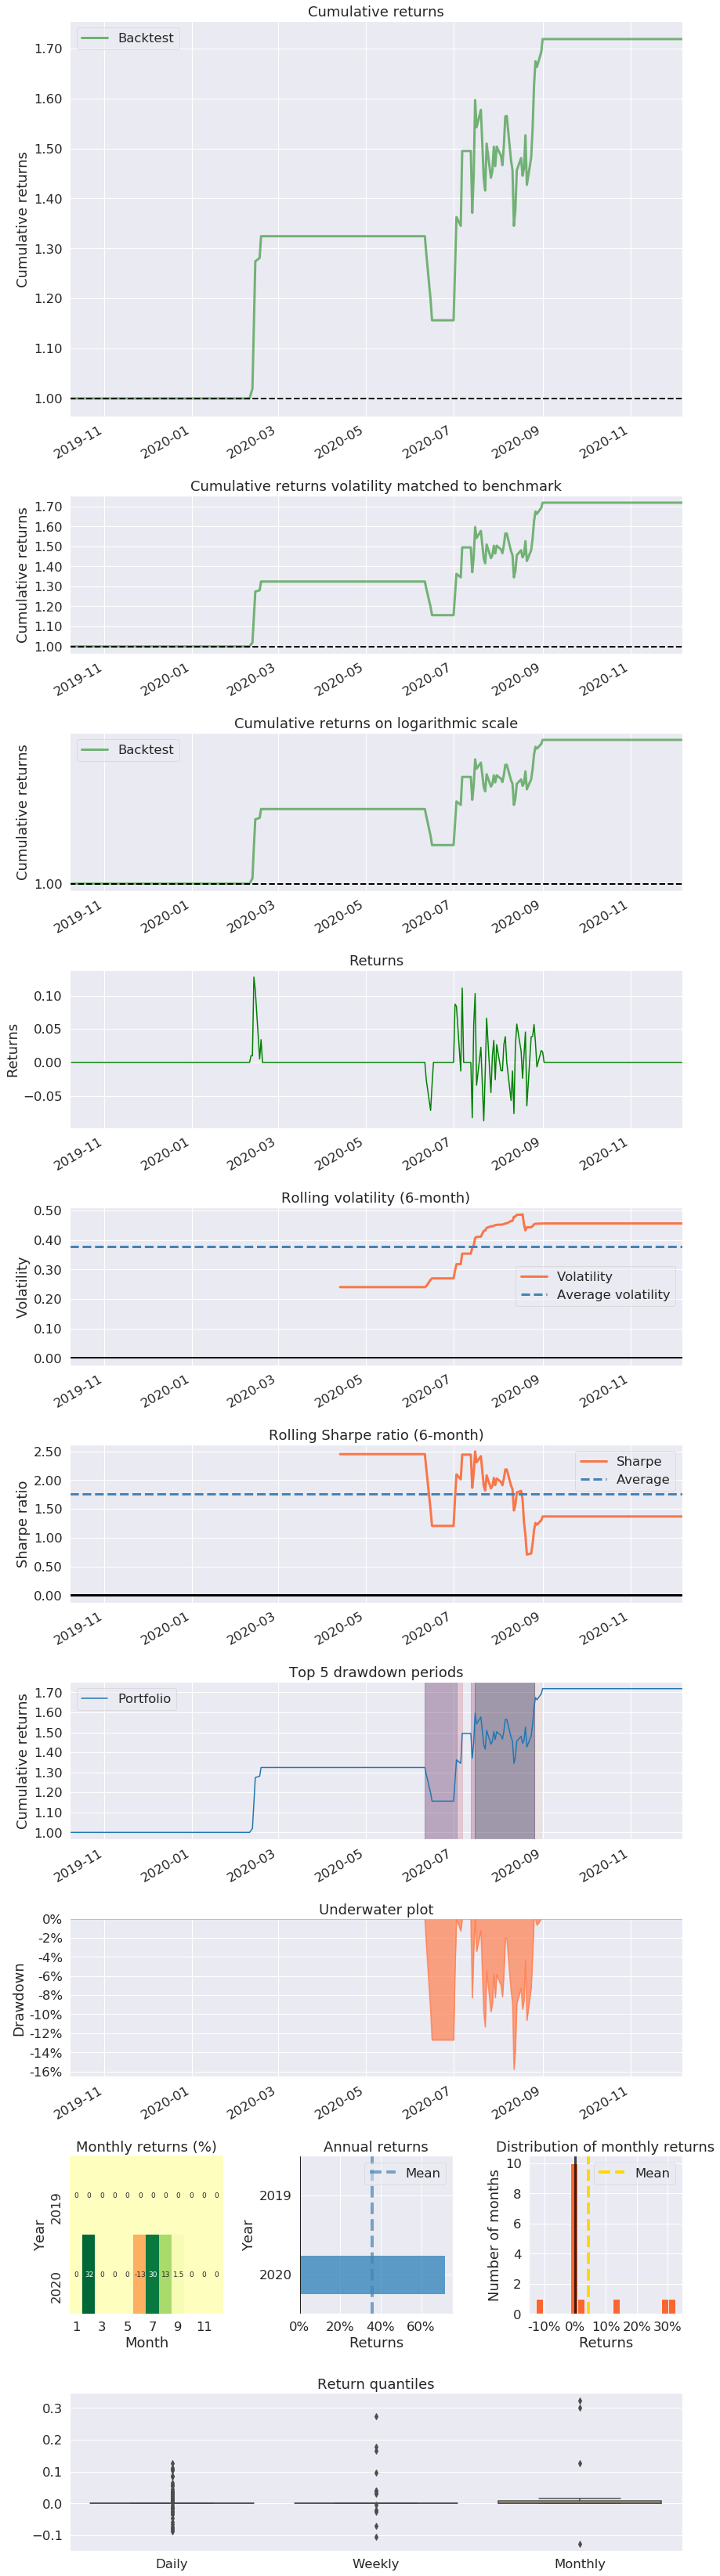

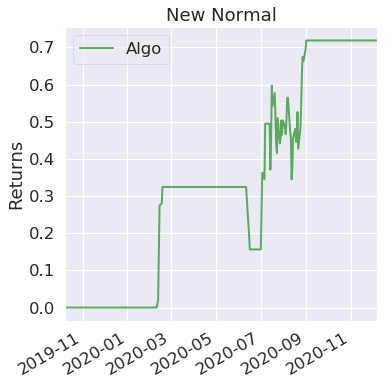

In [71]:
pf.create_full_tear_sheet(ret)